<a href="https://colab.research.google.com/github/RogerCL24/ANN/blob/main/6_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wc = pd.read_csv("World Cup 2018 Dataset.csv")

In [3]:
wc.head()

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [4]:
# dataset results

results = pd.read_csv('results.csv')

In [5]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# clean "neutral" column

results = results.drop(["neutral"],axis=1)

In [7]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [8]:
# add new column "winner"

winner = []

# win or tie

for i in range(len(results['home_team'])):
  if results['home_score'][i] > results['away_score'][i]:
    winner.append(results['home_team'][i])
  elif results['home_score'][i] <  results['away_score'][i]:
    winner.append(results['away_team'][i])
  else:
    winner.append('Tie')

results['winning_team'] = winner

# add new column "goal_difference"
results["goal_difference"] = np.absolute(results['home_score'] - results['away_score'])


In [9]:
results.tail(7)

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
39001,2018-06-03,South Africa,Madagascar,0,0,COSAFA Cup,Polokwane,South Africa,Tie,0
39002,2018-06-03,Zimbabwe,Botswana,1,1,COSAFA Cup,Polokwane,South Africa,Tie,0
39003,2018-06-04,Italy,Netherlands,1,1,Friendly,Turin,Italy,Tie,0
39004,2018-06-04,Serbia,Chile,0,1,Friendly,Graz,Austria,Chile,1
39005,2018-06-04,Slovakia,Morocco,1,2,Friendly,Geneva,Switzerland,Morocco,1
39006,2018-06-04,Armenia,Moldova,0,0,Friendly,Kematen,Austria,Tie,0
39007,2018-06-04,India,Kenya,3,0,Friendly,Mumbai,India,India,3


In [10]:
df_spain = results[(results["home_team"] == "Spain") | (results["away_team"] == "Spain")]
df_spain.head(7)

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
602,1921-12-18,Spain,Portugal,3,1,Friendly,Madrid,Spain,Spain,2
615,1922-04-30,France,Spain,0,4,Friendly,Le Bouscat,France,Spain,4
667,1922-12-17,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,Spain,1
673,1923-01-28,Spain,France,3,0,Friendly,San Sebastián,Spain,Spain,3
674,1923-02-04,Belgium,Spain,1,0,Friendly,Antwerp,Belgium,Belgium,1
753,1923-12-16,Spain,Portugal,3,0,Friendly,Seville,Spain,Spain,3
761,1924-03-09,Italy,Spain,0,0,Friendly,Milan,Italy,Tie,0


In [11]:
df_spain.shape

(669, 10)

In [12]:
# add new column MATCH_YEAR

spain = df_spain.iloc[:]

year = []

for row in spain["date"]:
  year.append(int(row[:4]))
spain["match_year"] = year

In [13]:
# since 1930 there is WC

spain_1930 = spain[spain.match_year >= 1930]
spain_1930.count()

date               648
home_team          648
away_team          648
home_score         648
away_score         648
tournament         648
city               648
country            648
winning_team       648
goal_difference    648
match_year         648
dtype: int64

In [14]:
# Ploting winrate

winrate = []
for row in spain_1930["winning_team"]:
  if row != 'Spain' and row != 'Tie':
    winrate.append('Loss')
  else:
    winrate.append(row)
dfwinrate = pd.DataFrame(winrate, columns=["resultSpain"])

In [15]:
# Plot with Seaborn and show
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

([<matplotlib.axis.XTick at 0x7f5d26652650>], [Text(1930, 0, '')])

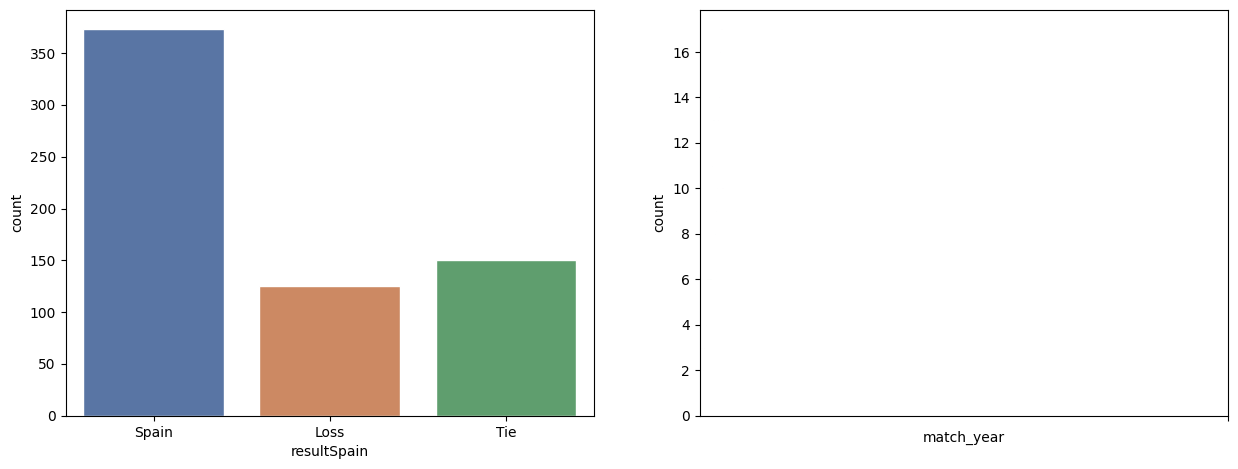

In [16]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5.27)

sns.set(style="darkgrid")

# left plot
sns.countplot(x="resultSpain", data=dfwinrate, ax = ax[0])

# right plot
sns.countplot(x="match_year", data=spain_1930, ax = ax[1])

plt.xticks(np.arange(min(spain_1930.match_year), max(spain_1930.match_year), 100))

In [17]:
# organizing the DATASET

# WC teams
wc_teams = ['Australia','Iran','Japan','Korea','Saudi Arabia','Egypt',
            'Morocco','Nigeria','Senegal','Tunisia',
            'Costa Rica','Mexico','Panama','Argentina',
            'Brazil','Colombia', 'Peru', 'Uruguay',
            'Belgium', 'Croatia', 'Denmark', 'England',
            'France', 'Germany', 'Iceland', 'Poland',
            'Portugal', 'Russia', 'Serbia',
            'Spain', 'Sweden','Switzerland']
# home - away

df_teams_home = results[results['home_team'].isin(wc_teams)]
df_teams_away = results[results['away_team'].isin(wc_teams)]

In [25]:
df_teams = pd.concat((df_teams_home,df_teams_away))
df_teams.drop_duplicates()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Tie,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,England,1
...,...,...,...,...,...,...,...,...,...,...
38965,2018-05-31,Luxembourg,Senegal,0,0,Friendly,Luxembourg,Luxembourg,Tie,0
38970,2018-06-01,Turkey,Tunisia,2,2,Friendly,Geneva,Switzerland,Tie,0
38972,2018-06-01,Czech Republic,Australia,0,4,Friendly,Sankt Pölten,Austria,Australia,4
38987,2018-06-02,Austria,Germany,2,1,Friendly,Klagenfurt,Austria,Austria,1


In [19]:
year = []
for row in df_teams['date']:
  year.append(int(row[:4]))
df_teams['match_year'] = year

In [20]:
df_teams.shape

(20279, 11)

In [21]:
# teams since 1930 list
df_teams30 = df_teams[df_teams.match_year >= 1930]
df_teams30.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
38987,2018-06-02,Austria,Germany,2,1,Friendly,Klagenfurt,Austria,Austria,1,2018
38995,2018-06-03,Saudi Arabia,Peru,0,3,Friendly,St. Gallen,Switzerland,Peru,3,2018
38996,2018-06-03,Spain,Switzerland,1,1,Friendly,Vila-real,Spain,Tie,0,2018
38997,2018-06-03,Croatia,Brazil,0,2,Friendly,Liverpool,England,Brazil,2,2018
39005,2018-06-04,Slovakia,Morocco,1,2,Friendly,Geneva,Switzerland,Morocco,1,2018


In [24]:
# drop useless columns
df_teams30 = df_teams30.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference'], axis=1)

In [27]:
df_teams30.head()

,home_team,away_team,winning_team,match_year
1230,Spain,Czechoslovakia,Spain,1930
1231,Portugal,Czechoslovakia,Portugal,1930
1237,Portugal,France,Portugal,1930
1238,Germany,Italy,Italy,1930
1240,France,Switzerland,Tie,1930


In [28]:
# index reset

df_teams30 = df_teams30.reset_index(drop=True)
df_teams30.head()

,home_team,away_team,winning_team,match_year
0,Spain,Czechoslovakia,Spain,1930
1,Portugal,Czechoslovakia,Portugal,1930
2,Portugal,France,Portugal,1930
3,Germany,Italy,Italy,1930
4,France,Switzerland,Tie,1930


In [31]:
# settings on 'winning_team' column

df_teams30.loc[df_teams30.winning_team == df_teams30.home_team, 'winning_team'] = 2
df_teams30.loc[df_teams30.winning_team == 'Tie', 'winning_team'] = 1
df_teams30.loc[df_teams30.winning_team == df_teams30.away_team, 'winning_team'] = 0
df_teams30 = df_teams30.drop(['match_year'], axis=1)
df_teams30.head(3)

,home_team,away_team,winning_team
0,Spain,Czechoslovakia,2
1,Portugal,Czechoslovakia,2
2,Portugal,France,2


In [32]:
# split DATASET in training and testing

from sklearn.model_selection import train_test_split

In [34]:
# getdummies de Pandas

df_final = pd.get_dummies(df_teams30, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
df_final.head(3)

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# X - Y
X = df_final.drop(['winning_team'], axis=1)

Y = df_final['winning_team']
Y = Y.astype('int')

# training / testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
X_train.shape

(15348, 412)

In [39]:
X_test.shape

(3838, 412)

In [40]:
# Training the model

# import the algortihm with sklearn
from sklearn.linear_model import LogisticRegression

In [41]:
# define the model
model_logreg = LogisticRegression()

# training
model_logreg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model_logreg.score(X_train, Y_train)

0.5721918165233255

In [44]:
model_logreg.score(X_test, Y_test)

0.5677436164669099

In [45]:
# other evaluations
from sklearn.metrics import accuracy_score, log_loss

# other models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
models = [KNeighborsClassifier(3),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          LogisticRegression()
          ]

In [50]:
# logs
log_cols = ["Classifier", "Accuracy"] # what model was and the accuracy of that model
log = pd.DataFrame(columns=log_cols)

# accuracy
acc_dict = {}

In [51]:
 # training the 4 models

for clf in models:
  name = clf.__class__.__name__
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_pred)

  if name in acc_dict:
    acc_dict[name] += acc
  else:
    acc_dict[name] = acc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# "acc_dict" iteration

for clf in acc_dict:
  acc_dict[clf] = acc_dict[clf] / 10.0
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log = log.append(log_entry)

<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

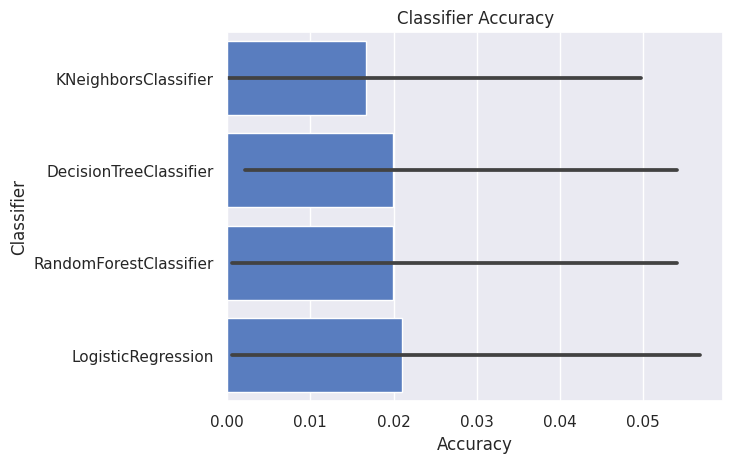

In [57]:
# results plot

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")